#### Since the use of correlation as an error metrics is not conventional, we here also consider the two conventional metrics and see how all three error metrics compare. 

In [16]:
import pingouin as pg
import pandas as pd
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
import seaborn
import math
from os import listdir
from os.path import dirname, join
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load Original and Fitted Time-series

#### Construct a dictionary that maps subject ID number (as in the raw .mat filename) to row numbers in the 3D array original_ts and fitted_ts. We use this to make sure that the same row of original_ts and fitted_ts correpond to the same subject.¶

In [4]:
file_dir = 'E:/projects/connectome/data/FMRI_820subjects'
file_names = listdir(file_dir)

ID_to_row_num = {}
for row_num,file_name in enumerate(file_names):
    ID_num = file_name[-10:-4]
    subject_ID = 'sub'+ID_num
    ID_to_row_num[subject_ID] = row_num 

In [5]:
# Load original time series
original_ts = [None for _ in range(len(file_names))] # original_ts[i][j] stores the time series of region j of subject i 
file_dir = 'E:/projects/connectome/data/FMRI_820subjects'
file_names = listdir(file_dir)

for file_name in file_names:
    ID_num = file_name[-10:-4]
    subject_ID = 'sub'+ID_num
    
    file = join(file_dir,file_name)
    file_mat = scipy.io.loadmat(file)
    
    original_ts[ID_to_row_num[subject_ID]]=file_mat['tc']

    
print("Total number of files loaded: "+str(len(original_ts)))

Total number of files loaded: 820


In [6]:
# Load ensemble fitted ensemble for (p,q) from 0-5
fitted_ts = [None for _ in range(len(file_names))]
file_dir = 'E:/projects/connectome/results/HurstExp_ARMA_results_0_to_5/ensemble_ts'
file_names = listdir(file_dir)

for file_name in file_names:
    ID_num = file_name[-10:-4]
    subject_ID = 'sub'+ID_num
    
    file = join(file_dir,file_name)
    file_mat = scipy.io.loadmat(file)
    
    fitted_ts[ID_to_row_num[subject_ID]]=file_mat['ensemble_ts']

    
print("Total number of files loaded: "+str(len(fitted_ts)))

Total number of files loaded: 820


# Squared Error

In [34]:
SE = []
for sub in range(820):
    sub_SE = []
    for reg in range(160):
        sub_SE.append(math.sqrt(1200*mean_squared_error(original_ts[sub][:,reg],fitted_ts[sub][reg])))
    SE.append(sub_SE)

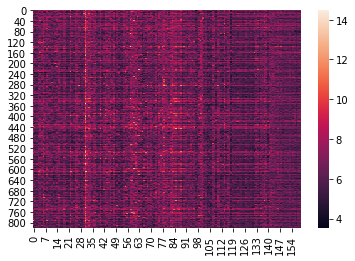

In [29]:
seaborn.heatmap(SE)
plt.show()

# Absolute Error

In [32]:
AE = []
for sub in range(820):
    sub_AE = []
    for reg in range(160):
        sub_AE.append(1200*mean_absolute_error(original_ts[sub][:,reg],fitted_ts[sub][reg]))
    AE.append(sub_AE)

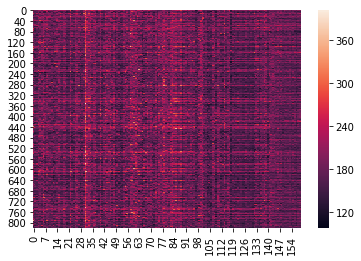

In [33]:
seaborn.heatmap(AE)
plt.show()

#### As we can see that using Absolute Error or Squared Error to compare ARMA fits across regions is no better than using just correlation (the regional differences are observable but not as distinctive).